In [5]:
import geopandas as gpd
# import fiona|
import leafmap.leafmap as leafmap 
import pandas as pd
import re

# prep data

In [11]:
path = "../models//BERTopic100CharMin2500CharMax_10ClassesNewestData/df.csv"

def count_reaction(reaction):
    if isinstance(reaction, str):
        m = re.findall('count=(.+?),', reaction)
        m = list(map(int, m))
        return sum(m)
    else:
        return float(0)

def prep_data(path):
    df = pd.read_csv(path)
    df['uniqueIdentifier'] = df.apply(lambda x: x["chat"] + "_" + str(x["messageID"]), axis=1)
    df['uniqueIdentifierReply'] = df.apply(lambda x: x["chat"] + "_" + str(x["messageReplyID"])[:-2], axis=1)
    class_name_dict = {'no_class':-1,
            'medical': 0, 
            'complaints': 1,
            'asylum_volunteering': 2,
            'banking': 3,
            'train_travel': 4,
            'S_Status': 5,
            'accomodation': 6,
            'veterinarian': 7,
            'passport_information': 8,
            'transport_UKR_CH': 9}
    df['cluster_names'] = df['cluster'].apply(lambda x: list(class_name_dict.keys())[list(class_name_dict.values()).index(x)])
    df['week']=df['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1])
    df["reaction_count"] = df.apply(lambda x: count_reaction(x.messageReactions), axis=1)
    df.to_csv(path.split(".csv")[0] + "_prep.csv", index=False)

prep_data(path)



In [13]:
df = pd.read_csv("../models//BERTopic100CharMin2500CharMax_10ClassesNewestData/df_prep.csv")

In [37]:
list = ["all found clusters"] + df.cluster_names.unique().tolist()
# list.append()

TypeError: 'numpy.ndarray' object is not callable

In [39]:
df.cluster_names.unique().tolist()

['no_class',
 'banking',
 'passport_information',
 'veterinarian',
 'train_travel',
 'medical',
 'asylum_volunteering',
 'accomodation',
 'complaints',
 'transport_UKR_CH',
 'S_Status']

In [33]:
list = [list.append(i) for i in df.cluster_names.unique()]

# gpd & leafmap

In [4]:
chf_shp = gpd.read_file('../data/shapefiles/swisscantonsmod/ch-cantons.shp')
# chf_plot.plot()

NameError: name 'gpd' is not defined

In [35]:
chf_shp.to_file("../data/geodata/geojson/chf.geojson", driver="GeoJSON")

In [2]:
map_select = leafmap.Map(center=[46.449212, 7.734375], 
                         zoom = 8, 
                         layers_control=True, 
                         measure_control=False, 
                         attribution_control=False)
m = leafmap.Map()

In [36]:
gdf = gpd.read_file("../data/geodata/geojson/chf.geojson")

In [51]:
m.add_gdf(gdf)

In [52]:
m

Map(center=[46.81572914123544, 8.22558784484869], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

In [53]:
gdf = gpd.read_file(
    "https://github.com/giswqs/leafmap/raw/master/examples/data/cable_geo.geojson"
)

In [54]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Cable lines")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [3]:
m = leafmap.Map(center=[0, 0], zoom=2)
in_geojson = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/cable-geo.geojson'
m.add_geojson(in_geojson, layer_name="Cable lines")
m

Exception: Extra data: line 1 column 4 (char 3)

In [56]:
path_to_data = gpd.datasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [57]:
geojson = leafmap.gdf_to_geojson(gdf, epsg="4326")

In [59]:
m = leafmap.Map()
# m.add_gdf(gdf, layer_name="New York boroughs", fill_colors=["red", "green", "blue"])
# m

In [62]:
gdf

,fid,NAME,POP_EST,POP_RANK,GDP_MD_EST,INCOME_GRP,ISO_A2,ISO_A3,CONTINENT,SUBREGION,geometry
0,1,Fiji,920938,11,8374.0,4. Lower middle income,FJ,FJI,Oceania,Melanesia,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,2,Tanzania,53950935,16,150600.0,5. Low income,TZ,TZA,Africa,Eastern Africa,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
2,3,W. Sahara,603253,11,906.5,5. Low income,EH,ESH,Africa,Northern Africa,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
3,4,Canada,35623680,15,1674000.0,1. High income: OECD,CA,CAN,North America,Northern America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,5,United States of America,326625791,17,18560000.0,1. High income: OECD,US,USA,North America,Northern America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...
171,172,Montenegro,642550,11,10610.0,3. Upper middle income,ME,MNE,Europe,Southern Europe,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42..."
172,173,Kosovo,1895250,12,18490.0,4. Lower middle income,XK,-99,Europe,Southern Europe,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42..."
173,174,Trinidad and Tobago,1218208,12,43570.0,2. High income: nonOECD,TT,TTO,North America,Caribbean,"MULTIPOLYGON (((-61.68000 10.76000, -61.10500 ..."
174,175,S. Sudan,13026129,14,20880.0,5. Low income,SS,SSD,Africa,Eastern Africa,"MULTIPOLYGON (((30.83385 3.50917, 29.95350 4.1..."


In [63]:
data

'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/countries.geojson'

In [ ]:
import leafmap
import geopandas as gpd

data = "https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/countries.geojson"
gdf = gpd.read_file(data)

m = leafmap.Map()
m.add_labels(data, "NAME", font_size="12pt", font_color="blue", font_family="arial", font_weight="bold")
m.add_gdf(gdf=gdf)
m

In [6]:
m = leafmap.Map(center=[40, -100], zoom=4)
cities = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_cities.csv'
regions = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_regions.geojson'

m.add_geojson(regions, layer_name='US Regions')
# m.add_points_from_xy(
#     cities,
#     x="longitude",
#     y="latitude",
#     color_column='region',
#     icon_names=['gear', 'map', 'leaf', 'globe'],
#     spin=True,
#     add_legend=True,
# )
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

<AxesSubplot:>

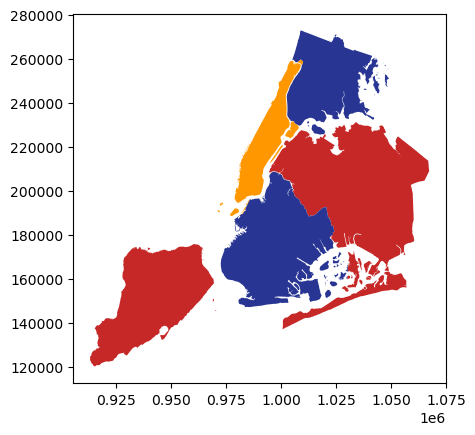

In [3]:
gdf = gpd.read_file(gpd.datasets.get_path('nybb'))
# adding a column with color names (gdf has 5 rows)
gdf['color'] = ['#C62828', '#C62828', '#283593', '#FF9800', '#283593']
gdf.plot(color=gdf['color'])  

In [11]:
m = leafmap.Map(center=[46.449212, 7.734375], zoom=7)
gdf = gpd.read_file("../data/geodata/geojson/chf.geojson")
m.add_gdf(gdf, layer_name='chf')
m

Map(center=[46.449212, 7.734375], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [12]:
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,223,CHE,Switzerland,1,Aargau,Canton|Kanton|Chantun,Canton,None,Argovia|Arg¢via|Argovie,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ..."
1,223,CHE,Switzerland,2,Appenzell Ausserrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Ausser-Rhoden|Appenzell Outer Rhodes...,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ..."
2,223,CHE,Switzerland,3,Appenzell Innerrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Inner-Rhoden|Appenzell Inner Rhodes|...,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3..."
3,223,CHE,Switzerland,4,Basel-Landschaft,Canton|Kanton|Chantun,Canton,None,Bâle-Campagne|Basel-Country|Baselland|Basel-La...,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4..."
4,223,CHE,Switzerland,5,Basel-Stadt,Canton|Kanton|Chantun,Canton,None,Bâle-Ville|Basel-City|Basel-Town|Basilea-Citad...,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ..."
5,223,CHE,Switzerland,6,Bern,Canton|Kanton|Chantun,Canton,None,Berna|Berne,"MULTIPOLYGON (((7.09284 46.89419, 7.09202 46.8..."
6,223,CHE,Switzerland,7,Fribourg,Canton|Kanton|Chantun,Canton,None,Freiburg|Friburg|Friburgo,"MULTIPOLYGON (((6.78581 46.74974, 6.78684 46.7..."
7,223,CHE,Switzerland,8,Genève,Canton|Kanton|Chantun,Canton,None,Cenevre|Genebra|Geneve|Geneva|Genevra|Genf|Gin...,"MULTIPOLYGON (((6.18406 46.34775, 6.18559 46.3..."
8,223,CHE,Switzerland,9,Glarus,Canton|Kanton|Chantun,Canton,None,Glaris|Glarona|Glaruna,"POLYGON ((9.07083 47.13050, 9.07307 47.12995, ..."
9,223,CHE,Switzerland,10,Graubünden,Canton|Kanton|Chantun,Canton,None,Graubünden|Grigioni|Grischun|Grisons,"MULTIPOLYGON (((10.20978 46.62572, 10.21465 46..."


In [12]:
if canton_select=="all Cantons":
    m = leafmap.Map(center=[46.449212, 7.734375], zoom=7)
    m.add_gdf(gdf, layer_name="Swiss Cantons", fill_colors=["red"])
    m.to_streamlit()

geopandas.geodataframe.GeoDataFrame

In [13]:
regions

'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/us_regions.geojson'

In [19]:
path_to_data = gpd.datasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [10]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="New York boroughs", fill_colors=["blue"])
m.add_gdf(gdf[gdf.BoroName=="Queens"], layer_name="choosen Canton", fill_colors=["red"])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…